# Starbucks Capstone Challenge

- <a id='TOC'>Table of Contents</a>
    - <a href='#Intro'>Introduction </a>
        - <a href='#Dataset'>Datasets definition </a>
        - <a href='#authornote'>Author Notes</a> 
    - <a href='#sec_0_0'>Section 0: Import Librarys and Data </a>
    - <a href='#sec_1_0'>Section 1: Clean and Organizae Data </a>
        - <a href='#sec_1_1'>Section 1.1: Match Transcript </a>
    - <a href='#sec_2_0'>Section 2: Explore Data </a>
        - <a href='#sec_2_1'>Section 2.1: Genreal Exploration </a>
        - <a href='#sec_2_2'>Section 2.2: Demographic Histographical Analysis </a>
        - <a href='#sec_2_3'>Section 2.3: Exploration of Offer Factors Variables </a>
        - <a href='#sec_2_4'>Section 2.3: Exploration of Response Variables </a>
    - <a href='#sec_3_0'>Section 4: Analysis </a>
        - <a href='#sec_3_1'>Section 3.1: PCA</a>
        - <a href='#sec_3_2'>Section 3.2: K-Means</a>
        - <a href='#sec_3_3'>Section 3.3: Compare population segments</a>
        - <a href='#sec_3_4'>Section 3.4: </a>



- Graphs
    - Section 2.2: 
        - <a href='#fig2_2a'>Fig 2.2a: Distribution of Income</br></a>
        - <a href='#fig2_2b'>Fig 2.2b: Distribution of Income by Gender</a>
        - <a href='#fig2_2c'>Fig 2.2c: Age Distribution by Gender</a>
        - <a href='#fig2_2d'>Fig 2.2d: Membership Length by Gender</a>
        - <a href='#fig2_2e'>Fig 2.2e: Jointplot: age by income</a>
        - <a href='#fig2_2f'>Fig 2.2f: Jointplot: Membership Length by Income</a>
        - <a href='#fig2_2g'>Fig 2.2g: Jointplot: age by Membership Length</a>
    - Section 2.3: 
        - <a href='#fig2_3a'>Fig 2.3a: Proportion of offers rcvd by individuals</a>
        - <a href='#fig2_3b'>Fig 2.3b: Offer Difficulty Distribution</a>
    - Section 2.4
        - <a href='#fig2_4a'>Fig 2.4a: Coorelation Heatmap</a>
        - <a href='#fig2_4b'>Fig 2.4b: Distibution of Actions Completed by Age</a>
        - <a href='#fig2_4c'>Fig 2.4c: Distibution of Actions Completed by Income</a>
        - <a href='#fig2_4d'>Fig 2.4d: Actions Completed by Gender </a>
        - <a href='#fig2_4e'>Fig 2.4e: Distribution of number of offers per person</a>
        - <a href='#fig2_4f'>Fig 2.4f: Distribution of Time of Response to Offers </a>
        - <a href='#fig2_4g'>Fig 2.4g: Distribution of Time of Response to Offers (by gender)</a>
    - Section 4.3
        - <a href='#fig4_3a'>Fig 4.3a</a>
        - <a href='#fig4_3b'>Fig 4.3b</a>
        - <a href='#fig4_3c'>Fig 4.3c</a>
    
    

<a id='Intro'></a>
## Introduction  
<a href='#TOC'>Jump to top </a>

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

**Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type** This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

<a id='Dataset'></a>

### Data Sets
<a href='#TOC'>Jump to top </a>

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


<a id='authornote'></a>
### Author Notes

Expanded notes on thought process are contained in <a href='Notes.ipynb'>Notes.ipynb Jupyter notebook</a> which is stored in the same directory

<a id='sec_0_0'></a>
## 0. Import Librarys and Data
<a href='#TOC'>Jump to top </a>

In [ ]:
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
tqdm.pandas()
import json
import graphviz
import importlib
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
import sklearn.metrics as met
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import time
import pickle
from joblib import dump, load
from sklearn.tree import export_graphviz
from subprocess import call
from graphviz import render
from sklearn import tree
import os
import graphviz
import visuals_new as vs  # Not written by author: Provied as part of CharityML project
from sklearn.decomposition import PCA
%matplotlib inline


In [182]:
import SB_CAP_fcns as sbFcn

In [185]:
importlib.reload(sbFcn)

<module 'SB_CAP_fcns' from 'C:\\Users\\thoma\\Documents\\Udacity\\StarbucksCapstone\\SB_CAP_fcns.py'>

In [186]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

<a id='sec_1_0'></a>
## 1. Clean and Organize Data

<a href='#TOC'>Jump to top </a>

In [ ]:
## Are all the missing gender and income on matching rows?
(17000-14825)==profile[(profile.gender.isna())&(profile.income.isna())].shape[0]

In [ ]:
def organize_raw_data(portfolio=portfolio,profile=profile,transcript=transcript):
    ''' This function organizes the raw data via setting datatype, setting indexes, and onehotencoding
    input: Startbuck challenge raw dataframes: portfolio,profile, and transcrips
    
    output: (7 dataframes, 3 revised originals and 4 which are filtered versions of transcript)
    portfolio_new: portfolio (one hot encoded channels, some column renames)
    profile_new: cleaned profile (member start date to datetime, one hot encoded gender)
    transcript_new: cleaned transcript 
        (value dict-> one hot encoded event type, 
        amount(spend), reward(completion), offer_id(offers,view/complte))
    t_offer: transcript_new filtered:offers only
    t_viewed: transcript_new filtered:viewed only
    t_trans: transcript_new filtered:transactions only
    t_compl: transcript_new filtered:complteted offers only
    
    '''
    
    
    ############### Portfolio
    portfolio.rename(columns={'id':'offer_id'},inplace=True) # match other table
    
    # one hot encode channels
    mlb = MultiLabelBinarizer() 
    portfolio = portfolio.join(pd.DataFrame(mlb.fit_transform(portfolio.pop('channels')),
                          columns=mlb.classes_,
                          index=portfolio.index))
    portfolio = portfolio.merge(pd.get_dummies(portfolio['offer_type'],prefix='offer',prefix_sep='_'),left_index=True,right_index=True)
    #portfolio.drop(columns='offer_type',inplace=True)
    # Since offer_id is unique, we can use that as an index
    portfolio.set_index('offer_id')
    
    ############### Profile
    #Split/Drop N/A  - approx 13% of profile data was missing gender and income, the rows missing gender also are missing income.
    #  Will look to see if there are any differences later on
    profile_na = profile[profile.gender.isna()]
    #profile = profile.dropna(axis = 0)  - Will be doing this later so the profile N/A lines will be processed
    
    #Convert to datetime
    profile.loc[:,'became_member_on']=pd.to_datetime(profile['became_member_on'],format='%Y%m%d')
    
    #one hot encode gender
    profile = profile.merge(pd.get_dummies(profile['gender'],prefix='gender',prefix_sep='_'),left_index=True,right_index=True)
    
    #provides a relative length of membership based on the latest membership join.
    profile['memb_leng'] = (profile.became_member_on.max()-profile.became_member_on).dt.days.astype(float)/(365.25/12)
    
    # Since id is unique, we can use that as an index
    profile.set_index('id',inplace=True)
    
    ################# Transcript
    
    # expand dict in 'value' to its own columns per dict key
    transcript = transcript.merge(transcript.value.apply(pd.Series),left_index=True,right_index=True)
    
    # cleaning up 'offer_id' and 'offer id', so as there is a single column
    transcript.loc[transcript['offer_id'].isna(),'offer_id'] = transcript[transcript['offer_id'].isna()]['offer id']
    
    #one hot encode event (transaction type)
    transcript = transcript.merge(pd.get_dummies(transcript['event'],prefix='event',prefix_sep='_'),left_index=True, right_index=True)
    transcript.drop(columns = ['offer id','value'],inplace=True)
    
    transcript = transcript[transcript['person'].isin(profile.index)].reset_index()
    
    #break apart into sub-df based on transaction tyle
    t_offer = transcript[transcript['event']=='offer received']
    t_viewed = transcript[transcript['event']=='offer viewed']
    t_trans = transcript[transcript['event']=='transaction']
    t_compl = transcript[transcript['event']=='offer completed']
    
    return portfolio,profile,profile_na,transcript,t_offer,t_viewed,t_trans,t_compl

In [ ]:
portfolio_new,profile_new,profile_na,transcript_new,t_offer,t_viewed,t_trans,t_compl = organize_raw_data()

<a href='#pick_load'>Jump to the latest pickle load checkpoint</a>

In [ ]:
transcript_new[transcript_new['event']=='transaction'].head()

In [ ]:
print('portfolio:', portfolio.shape)
print('portfolio_new',portfolio_new.shape)
print('profile',profile.shape)
print('profile_new', profile_new.shape)
print('transcript',transcript.shape)
print('transcript_new',transcript_new.shape)
print('t_offer',t_offer.shape)
print('t_viewed',t_viewed.shape)
print('t_compl',t_compl.shape)
print('t_trans',t_trans.shape)


In [ ]:
print(profile.income.mean(),
profile[profile.gender=='M'].income.mean(),
profile[profile.gender=='F'].income.mean(),
profile[profile.gender=='O'].income.mean())

<a id='sec_1_1'></a>
### 1.1 Matching Events
<a href='#TOC'>Jump to top </a>

The purpose of this section is to match pertinent events to thier respective offer.  So you have one row representing a series of events.
- All counted views are performed within the time window: time (of offer) + duration of offer
- All counted transactions are performed within the time window and after they view the offer.
- All rewards occur within time wintow

In [ ]:
###Lookup the duration of each offer and convert to hours to match offer time data.
###and create a time end

t_matched = pd.merge(t_offer,portfolio[['offer_id','duration']],on=['offer_id'],how='left')
t_matched['duration'] =t_matched['duration'].progress_apply(lambda x: x*24)
t_matched['time_end'] = t_matched['time'] + t_matched['duration']


###
### Merge view transcripts!
###

def id_viewed(row):
    ''' matches up offers and views by same person and offer within time limit.   
    Marks offer/person/time as viewed and notes the time of the view.
    
    input: df row per pd.apply()
    output: updated df row 
    '''
    for idx,trn in t_viewed[(t_viewed.person == row.person)&(t_viewed.offer_id == row.offer_id)].sort_values(by='time').iterrows():
        if (trn.time >= row.time) & (trn.time < row.time_end ):
            row['event_offer viewed'] = 1
            row['time_viewed'] = trn['time']
            return row
    return row

t_matched = t_matched.progress_apply(id_viewed,axis=1)

###
### merge transaction transcript!
###

t_matched['trans_time'] = np.nan
#t_matched['trans_index'] = np.nan  # Vestigal
t_matched['trans_spend'] = np.nan


def scrub_trans(row):
    '''
    Matches transactions to offer based on the following conditions
    - person matches
    - transaction was made after offer was made
    - transaction was viewed
    - transaction was made after the offer was viewed
    - transaction was made before offer expired.
    '''
    #print(row['person'])
    for idx,trn in t_trans[t_trans.person == row.person].sort_values(by='time').iterrows():
        if (trn.time >= row.time) & (row['event_offer viewed']==1) &(trn.time < row.time_end ) & (trn.time >= row.time_viewed):
            row['event_transaction'] = 1
            row['trans_time'] = trn['time']
            row['trans_spend'] = trn['amount']
            return row
    return row
 

t_matched = t_matched.progress_apply(scrub_trans,axis=1)



###
### Merge completed transactions
###

t_matched['reward'] = np.nan

def scrub_compl(row):
    '''   
    Runs through the t_offer dataframe and marks offer as complete under the following contionds
    

    marks the offer complete if
    - person and offer match
    - 
    
    input: df row per pd.apply() function
    '''
    for idx,trn in t_compl[(t_compl.person == row.person)&(t_compl.offer_id == row.offer_id)].sort_values(by='time').iterrows():
        if (trn.time >= row.time) & (trn.time < row.time_end ):
            row['event_offer completed'] = 1
            row['reward'] = trn.reward
            
            return row
    return row
 

t_matched = t_matched.progress_apply(scrub_compl,axis=1)

In [ ]:


###
### Save df to pickle
###

t_matched.to_pickle('combined_trans.pkl')

In [ ]:
events = pd.read_pickle('combined_trans.pkl')

**Combine profile and portfolio information to each line**

In [ ]:
# Merge pertinant fields from profile
prof_merge_col = ['age','income','gender','gender_F',
       'gender_M', 'gender_O', 'memb_leng']

events = events.merge(profile_new[prof_merge_col],how='left',left_on='person',right_on=profile_new.index)

# Merge pertinant fields from portfolio

port_merge_col = ['difficulty', 'offer_id', 'email', 'mobile',
       'social', 'web', 'offer_bogo', 'offer_discount',
       'offer_informational','reward']

events = events.merge(portfolio_new[port_merge_col],on='offer_id')
events.rename(columns={'reward_x':'reward_rcvd','reward_y':'reward_offd'},inplace=True)

#Other
events.drop(columns='amount',inplace=True)
events.rename(columns={'event_offer completed':'event_offer_completed','event_offer received':'event_offer_received','event_offer viewed':'event_offer_viewed'},inplace=True)

In [ ]:
events.info()

**N/A Strategy**

There are five columns with N/A in the data
    - time_viewed
    - trans_time
    - trans_spend
    - reward
    - income
    - gender
    
    1) time_viewed and trans_time are response variables (y) for those who completed those tasks.  I will remove these from the dataset for any predictive modeling
    2) Income and gender are omitted on appox 13% of records.  Important  to note that the income and gender are all missing from the same lines. Will remove these later when pertinant
    3) trans_spend and reward should be zero,because if there was no transaction there was no spend nor reward

In [ ]:
##mod
events.trans_spend.fillna(value=0,inplace=True)
events.reward_rcvd.fillna(value=0,inplace=True)

In [ ]:
events.to_pickle('events_merged.pkl')

<a id='pick_load'> Pickle Load</a>


In [ ]:
events_merged = pd.read_pickle('events_merged.pkl')

In [ ]:
def norm_and_std(df):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    '''This will create a copy of the df with standardized and normalzied columns'''
   
    ## non-boolean columns
    ''''', 'event', 'index', 'offer_id',
       'person', 'reward', 'time', 'time_end', 'time_viewed', 'trans_time',
       'trans_spend', 'age', 'income', 'gender', 'gender_F', 'gender_M',
       'gender_O', 'memb_leng', 'difficulty', 'email', 'mobile', 'social',
       'web', 'offer_bogo', 'offer_discount', 'offer_informational', 't_std',
       'time_viewed', 'trans_time'
    '''
    '''
    '''
    ## Normalize ##########################
    '''duration,reward,'time', 'time_end', 'time_viewed', 'trans_time',
       'trans_spend',difficulty
    '''
    
    ## Standardize
    ''''age', 'income','memb_leng'
    '''
    ## Drop
    '''event,index,offer_id,person,'gender' '''
    ## Bool
    '''
    'gender_F', 'gender_M',
       'gender_O,'email', 'mobile', 'social',
       'web', 'offer_bogo', 'offer_discount', 'offer_informational', 't_std'
       '''
    
    df2 = df.copy()
    
    ## Drop
    drop_na_cols = ['age','income','gender']
    df2.dropna(subset=drop_na_cols,inplace=True)
    
    drop_cols = ['event','index','offer_id','person','gender']
    df2.drop(drop_cols,inplace=True,axis=1)
    
    #Normalize time series data
    #I am normalizing this to the timescale of the individual offer.
    
    df2.loc[:,'time_viewed'] = (df2.time_viewed - df2.time) / (df2.time_end - df2.time )
    df2.loc[:,'trans_time'] = (df2.trans_time - df2.time) / (df2.time_end - df2.time )
    df2.loc[:,'time'] = (df2.time)/df2.time.max()
    
    #Normalizing since relative magnitude is important for these.
    mm_scaler = MinMaxScaler()
    df2[['difficulty','reward_rcvd','reward_offd','duration']] = mm_scaler.fit_transform(df2[['difficulty','reward_rcvd','reward_offd','duration']])
    
    ## Standardize
    s_scaler = StandardScaler()
    std_cols = ['age', 'income','memb_leng']
    df2[std_cols] = s_scaler.fit_transform(df2[std_cols])
    
  
    
    ## Standardize
    # Columns: 
    # New Colun
    return df2

In [ ]:
events_merged_std = norm_and_std(events_merged)

In [ ]:
events_merged_nona = events_merged.dropna(subset=['age','gender','income'])

In [ ]:
events_merged_nona.to_pickle('events_merged_nona.pkl')

In [ ]:
events_merged_nona = pd.read_pickle('events_merged_nona.pkl')

<a id='pickleload'></a>

<a id='sec_2_0'></a>
## Section 2.0: Explore Data
<a href='#TOC'>Jump to top</a>

<a id='sec_2_1'></a>
### Section 2.1: General Exploration
<a href='#TOC'>Jump to top</a>

In [ ]:
print(events_merged[['event_offer_received','event_offer_viewed','event_transaction','event_offer_completed']].sum())

tot_offers = events_merged.event_offer_received.sum()
tot_off_viewed = events_merged.event_offer_viewed.sum()
tot_off_purchased = events_merged.event_transaction.sum()
tot_off_rewarded = events_merged.event_offer_completed.sum()



tot_sum_purch = events_merged.trans_spend.sum()
#tot_sum_reward = events_merged.reward.sum()


print('Percentage viewed : {0:.2f}%'.format(100* tot_off_viewed/tot_offers))
print('Percentage offers purchased : {0:.2f}%'.format(100*tot_off_purchased/tot_offers))
print('Percentage offers completed : {0:.2f}%'.format(100*tot_off_rewarded/tot_offers))
print('Percentage offers viewed puchased : {0:.2f}%'.format(100*tot_off_purchased/tot_off_viewed))
print('Percentage offers viewed rewarded : {0:.2f}%'.format(100*tot_off_rewarded/tot_off_viewed))
print('Percentage of offers that were rewarded  : {0:.2f}%'.format(100*tot_off_rewarded/tot_off_purchased))
print('Percentage of purchases that were rewarded  : {0:.2f}%'.format(100*tot_off_rewarded/tot_off_purchased))

<a id='sec_2_2'></a>
### Section 2.2: Demographic Histographical Analysis
<a href='#TOC'>Jump to top</a>

In [ ]:
# removing the N/A for demographic analysis

<a id='fig2_2a'>Fig2.2a</a>

In [ ]:
ax2_2a1 = sns.distplot(events_merged.dropna(subset=['income']).income,bins=25)
ax2_2a1.set_title('Fig 2.2a1: Distribution of Income')

In [ ]:
ax2_2a1 = sns.distplot(events_merged_std.income,bins=25)
ax2_2a1.set_title('Fig 2.2a2: Distribution of Income')

In [ ]:
#it appears that there are some groupings in this distribution

<a id='fig2_2b'>Fig2.2b</a>

In [ ]:
fig_2_2b, (ax22b_0, ax22b_1, ax22b_2, ax22b_3) = plt.subplots(nrows=4, sharex=True,sharey=True, figsize=(8,12));
plt.ylim([0,0.000035])
fig_2_2b.subplots_adjust(hspace = 0)
sns.distplot(events_merged_nona.income,bins=25,ax=ax22b_0)
sns.distplot(events_merged_nona[events_merged_nona.gender_M == 1].income,bins=25,ax=ax22b_1)
sns.distplot(events_merged_nona[events_merged_nona.gender_F == 1].income,bins=25,ax=ax22b_2)
sns.distplot(events_merged_nona[events_merged_nona.gender_O == 1].income,bins=25,ax=ax22b_3)
ax22b_0.set_title("Fig 2.2b_0: Income Distribution (All)",y=.8)
ax22b_1.set_title("Fig 2.2b_1: Income Distribution (Male)",y=.8)
ax22b_2.set_title("Fig 2.2b_2: Income Distribution (Female)",y=.8)
ax22b_3.set_title("Fig 2.2b_3: Income Distribution (Other)",y=.8);


There appears to be groupings within the income, that are not related to gender.  It apppears to be 3-5 subgroups.  There are possibly something implit here.

In [ ]:
df_income = pd.DataFrame(events_merged_nona.income.describe()).rename(columns={'income':'all'}).transpose()
df_income = df_income.append(events_merged_nona[events_merged_nona.gender_M==1].income.describe().transpose())
df_income.rename(index={'income':'Male'},inplace=True)
df_income = df_income.append(events_merged_nona[events_merged_nona.gender_F==1].income.describe().transpose())
df_income.rename(index={'income':'Female'},inplace=True)
df_income = df_income.append(events_merged_nona[events_merged_nona.gender_O==1].income.describe().transpose())
df_income.rename(index={'income':'Other'},inplace=True)

df_income

<a id='fig2_2c'>Age Distribution by Gender</a>

In [ ]:
fig_2_2c, (ax22c_0, ax22c_1, ax22c_2, ax22c_3) = plt.subplots(nrows=4, sharey= True, sharex=True,figsize=(8,12))
plt.ylim([0,0.045])
fig_2_2c.subplots_adjust(hspace = 0)
#sns.distplot(events_merged.age.dropna(),bins=25,ax=ax2_0)
sns.distplot(events_merged_nona.age,bins=25,ax=ax22c_0)
sns.distplot(events_merged_nona[events_merged_nona.gender_M == 1].age,bins=25,ax=ax22c_1)
sns.distplot(events_merged_nona[events_merged_nona.gender_F == 1].age,bins=25,ax=ax22c_2)
sns.distplot(events_merged_nona[events_merged_nona.gender_O == 1].age,bins=25,ax=ax22c_3)
ax22c_0.set_title("Fig 2.2c_0: Age Distribution (All)",y=.8)
ax22c_1.set_title("Fig 2.2c_1: Age Distribution (Male)",y=.8)
ax22c_2.set_title("Fig 2.2c_2: Age Distribution (Female)",y=.8)
ax22c_3.set_title("Fig 2.2c_3: Age Distribution (Other)",y=.8);

In [ ]:
df_age = pd.DataFrame(events_merged_nona.age.describe()).rename(columns={'age':'all'}).transpose()
df_age = df_age.append(events_merged_nona[events_merged_nona.gender_M==1].age.describe().transpose())
df_age.rename(index={'age':'Male'},inplace=True)
df_age = df_age.append(events_merged_nona[events_merged_nona.gender_F==1].age.describe().transpose())
df_age.rename(index={'age':'Female'},inplace=True)
df_age = df_age.append(events_merged_nona[events_merged_nona.gender_O==1].age.describe().transpose())
df_age.rename(index={'age':'Other'},inplace=True)

df_age

There does appear to be two groupings here within the data

<a id='fig2_2d'>Membership Length by Gender</a>

In [ ]:
fig_2_2d, (ax22d_0,ax22d_1, ax22d_2, ax22d_3) = plt.subplots(nrows=4, sharex=True,sharey=True, figsize=(8,12))
fig_2_2d.subplots_adjust(hspace = 0)
sns.distplot(events_merged_nona.memb_leng,bins=25,ax=ax22d_0)
sns.distplot(events_merged_nona[events_merged_nona.gender_M == 1].memb_leng,bins=25,ax=ax22d_1)
sns.distplot(events_merged_nona[events_merged_nona.gender_F == 1].memb_leng,bins=25,ax=ax22d_2)
sns.distplot(events_merged_nona[events_merged_nona.gender_O == 1].memb_leng,bins=25,ax=ax22d_3)
ax22d_0.set_title("Fig 2.2 d_0: Membership Length Distribution (All)",y=.8)
ax22d_1.set_title("Fig 2.2 d_1: Membership Length Distribution (Male)",y=.8)
ax22d_2.set_title("Fig 2.2 d_2: Membership Length Distribution (Female)",y=.8)
ax22d_3.set_title("Fig 2.2 d_3: Membership Length Distribution (Other)",y=.8)

In [ ]:
fig_2_2d2, (ax22d2_0,ax22d2_1, ax22d2_2, ax22d2_3) = plt.subplots(nrows=4, sharex=True,sharey=True, figsize=(8,12))
fig_2_2d2.subplots_adjust(hspace = 0)
sns.distplot(events_merged_nona.memb_leng,hist_kws=dict(density=True,cumulative=True),bins=25,ax=ax22d2_0)
sns.distplot(events_merged_nona[events_merged_nona.gender_M == 1].memb_leng,hist_kws=dict(density=True,cumulative=True),bins=25,ax=ax22d2_1)
sns.distplot(events_merged_nona[events_merged_nona.gender_F == 1].memb_leng,hist_kws=dict(density=True,cumulative=True),bins=25,ax=ax22d2_2)
sns.distplot(events_merged_nona[events_merged_nona.gender_O == 1].memb_leng,hist_kws=dict(density=True,cumulative=True),bins=25,ax=ax22d2_3)
ax22d2_0.set_title("Fig 2.2 d_0: Membership Length Distribution (All)",y=.8)
ax22d2_1.set_title("Fig 2.2 d_1: Membership Length Distribution (Male)",y=.8)
ax22d2_2.set_title("Fig 2.2 d_2: Membership Length Distribution (Female)",y=.8)
ax22d2_3.set_title("Fig 2.2 d_3: Membership Length Distribution (Other)",y=.8)

There appears to be 3 distinct groups of members based on membership length
* members joining between ~38-58months
* members joining between ~12-38 months
* members joining in last 12 months 



<a id='fig2_2e'>Fig 2.2e: Jointplot: age by income</a>

In [ ]:
fig_2_2e = sns.jointplot(x='income',y='age',data=profile_new.dropna(subset=['income','age']),kind="kde")

Interesting here, the income distributions of younger folks is is limited to the lower end of the range and expandands as age increases.  Also age skews lower.

<a id='fig2_2f'>Fig 2.2f: Jointplot: Membership Length by Income</a>

In [ ]:
fig_2_2f = sns.jointplot(x=profile_new.dropna(subset=['income','age']).income,y=profile_new.dropna(subset=['income','age']).memb_leng,kind="kde")

It appears that the early and mid adopters tend to be distributed roughly the same as the general population.  

<a id='fig2_2g'>Fig 2.2g: Jointplot: age by Membership Length</a>

In [ ]:
fig_2_2g = sns.jointplot(x='memb_leng',y='age',data=profile_new.dropna(subset=['income','age']),kind="kde")

<a id='sec_2_3'></a>
## Section 2.3: Explore Offer Factors
<a href='#TOC'>Jump to top</a>

What do we want to know about the study factors?
- Person
    - [X] What is the distribution of offers
- Offer_Id (there are 10 offer ids)
    - [X] How many offers were made of each ID?
    - [X] How many offers were made to each person, on average?
- Difficulty
    - [X] What was the representative range of difficulty?  avg offer vs avg person?
- Distribution Method
    - [X]  
- Offer Type
    - [ ] 
- Reward
    

In [ ]:
events_merged.pivot_table(values = 'event_offer_received', index='person',columns='offer_id',aggfunc='count',fill_value=0).sum(axis=0)

In [ ]:
profile.shape[0]

In [ ]:
events_merged.pivot_table(values = 'event_offer_received', index='person',columns='offer_id',aggfunc='count',fill_value=0).sum(axis=1).mean()

<a id='fig2_3a'>Fig2.3a: Proportion of offers rcvd by individuals</a>

In [ ]:
fig_2_3a = sns.distplot(events_merged.pivot_table(values = 'event_offer_received', index='person',columns='offer_id',aggfunc='count',fill_value=0).mean(axis=1))
fig_2_3a.set_title("Fig 2.3a: Distribution of the proportion of offers an individual recieved")

In [ ]:
events_merged.pivot_table(values = 'event_offer_received', index='person',columns='offer_id',aggfunc='count',fill_value=0).mean(axis=1).mode()

<a id='fig2_3b'>Fig2.3b: Offer Difficulty Distribution</a>

In [ ]:
print("Average Offer Difficulty: ",portfolio_new.difficulty.mean())

fig_2_3b = sns.distplot(events_merged.pivot_table(values = 'difficulty', index='person',columns='offer_id',aggfunc='mean').mean(axis=1))
fig_2_3b.set_title("Fig 2.3b: Distribution of average (by person) offer difficulty")

In [ ]:
portfolio_new

<a id='sec_2_4'></a>
## Section 2.4: Explore Response Variable
<a href='#TOC'>Jump to top</a>

In [ ]:
print(events_merged[['event_offer_received','event_offer_viewed','event_transaction','event_offer_completed']].sum())

tot_offers = events_merged.event_offer_received.sum()
tot_off_viewed = events_merged.event_offer_viewed.sum()
tot_off_purchased = events_merged.event_transaction.sum()
tot_off_rewarded = events_merged.event_offer_completed.sum()



tot_sum_purch = events_merged.trans_spend.sum()
#tot_sum_reward = events_merged.reward.sum()


print('Percentage viewed : {0:.2f}%'.format(100* tot_off_viewed/tot_offers))
print('Percentage offers purchased : {0:.2f}%'.format(100*tot_off_purchased/tot_offers))
print('Percentage offers viewed puchased : {0:.2f}%'.format(100*tot_off_purchased/tot_off_viewed))
print('Percentage of offers that were rewarded  : {0:.2f}%'.format(100*tot_off_rewarded/tot_off_purchased))
print('Percentage of purchases that were rewarded  : {0:.2f}%'.format(100*tot_off_rewarded/tot_off_purchased))

First lets explore the main question in the simplist way possible?  Is there an overarching coorelation in purchasing to any demographic?

<a id='fig2_4a'>Fig2.4a: Feature Coorelation Heatmap</a>

In [ ]:
fig_2_4a, ax_2_4a = plt.subplots(figsize=(12,12))
sns.heatmap(events_merged_std[['age', 'income', 'gender_F', 'gender_M', 'gender_O','memb_leng', 'difficulty','reward_offd', 'mobile', 'social', 'web',
       'offer_bogo', 'offer_discount', 'offer_informational',
       'event_offer_viewed', 'event_transaction', 'event_offer_completed','time_viewed',
       'trans_time']].corr(),annot=True,ax=ax_2_4a,cmap='Spectral',vmin=-0.4, vmax=0.4,fmt='.2f')
ax_2_4a.set_title('Fig 2.4a: Coorelation Heatmap')

There is a lot of information in this cooreation matrix.  I am focusing on which factors coorelate the most with event offer viewed, trans, and completion.

    - Viewed
        - Top Positive Coorelation
            - Offer on social media (0.5)
            - Offered on mobile platform (0.3)
        - Top Negative Coorelations
            - informational offer
            - difficulty
    - Transaction
        - Top Positive Coorelation
            - Offer on social media (0.37)
            - Offered on mobile platform (0.2)
        - Top Negative Coorelation
            - Informational Offer (-0.20)
    - Completion
        - Top Positive Coorelations
            - Difficulty (0.28)
            - Offer discount (0.26)
            - income (0.18)
        - Top Negative Coorelations
            - Offer_informational (-0.48) - This makes sense since informational offers didnt include rewards
            - gender_M (-0.13)

    

<a id='fig2_4b'>Fig 2.4b: Actions Completed by Age </a>

In [ ]:

fig_2_4b, ax_2_4b = plt.subplots(nrows=1, ncols=2,figsize=(8,4))
sns.distplot(events_merged_nona[events_merged_nona.event_transaction==1].age,bins=25,ax=ax_2_4b[0])
sns.distplot(events_merged_nona[events_merged_nona.event_transaction==0].age,bins=25,ax=ax_2_4b[0])
sns.distplot(events_merged_nona[events_merged_nona.event_offer_completed==1].age,bins=25,ax=ax_2_4b[1])
sns.distplot(events_merged_nona[events_merged_nona.event_offer_completed==0].age,bins=25,ax=ax_2_4b[1])
ax_2_4b[0].set_title('Event Transaction')
ax_2_4b[1].set_title('Event Completed')
fig_2_4b.legend(labels=['Complete','Incomplete'])
fig_2_4b.suptitle('Fig 2.4b: Actions Completed by age ')

The curves are almost identical, there does not seem to be an effect on age in making a transaciton

<a id='fig2_4c'>Fig 2.4c: Actions Completed by Income </a>

In [ ]:
fig_2_4c , ax_2_24c = plt.subplots(nrows=1, ncols=2,figsize=(8,4))
fig_2_4c.subplots_adjust(hspace = .2,wspace = .5)
sns.distplot(events_merged[events_merged.event_transaction==1].income.dropna(),bins=25,ax=ax_2_24c[0])
sns.distplot(events_merged[events_merged.event_transaction==0].income.dropna(),bins=25,ax=ax_2_24c[0])
sns.distplot(events_merged[events_merged.event_offer_completed==1].income.dropna(),bins=25,ax=ax_2_24c[1])
sns.distplot(events_merged[events_merged.event_offer_completed==0].income.dropna(),bins=25,ax=ax_2_24c[1])
ax_2_24c[0].set_title('Event Transaction')
ax_2_24c[1].set_title('Event Completed')
fig_2_4c.legend(labels=['Complete','Incomplete'])
fig_2_4c.suptitle('Fig 2.4c: Actions Completed by Income')

**Note** The two populatons are virtually overlapped in the event transaction.  But in the event completed (read: complete = received reward incomplete=info only) there is a little offset in the income of those who completed, the difference is likley not significant, it might suggest that people with higher incomes are more likley to responsd to promotions with rewards in compared to this with lower incomes.   

* I think I need some stats help on this one, I belive I would use a  Kolmogorov-Smirnov test, but I am not sure.

<a id='fig2_4d'>Fig 2.4d: Actions Completed by Gender </a>

In [ ]:
fig_2_4d, ax_2_4d = plt.subplots(nrows=1,ncols=2,figsize=(8,4),sharey=True)
sns.barplot(x=events_merged.gender,y=events_merged.event_transaction,ax=ax_2_4d[0])
sns.barplot(x=events_merged.gender,y=events_merged.event_offer_completed,ax=ax_2_4d[1])
ax_2_4d[0].set_title('Event Transaction')
ax_2_4d[1].set_title('Event Completed')
fig_2_4d.suptitle('Fig 2.4d: Actions Completed by Gender')

Men and Women appear to transact after viewing and offer at the same rate, but men disproportionally do not respond to the reward offers.  What is the baseline purchase frequency?

<a id='fig2_4e'>Fig 2.4e: Distribution of number of offers per person</a>

In [ ]:
fig2_4e = sns.distplot(events_merged.groupby(by='person').count()['index'],bins=10)
fig2_4e.set_title("Fig 2.4e: Frequency of the number of offers individuals recieve ")

What do we want to know about the study factors?
- Person
   - What is the distribution of offers
- Offer_Id (there are 10 offer ids)
  - How many offers were made of each ID?
  - How many offers were made to each person, on average?
- Difficulty
  - What was the representative range of difficulty?
- Distribution Method
  - 
- Offer Type
- Reward

In [ ]:
events_merged.groupby(by='offer_id').count()['index']

In [ ]:
events_merged.pivot_table(values='index',aggfunc='count',index='offer_id',columns=['person']).mean(axis=1)

In [ ]:
fig2_4f, ax_2_4f = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(16,8))
fig2_4f.subplots_adjust(hspace = .2,wspace = .2)

sns.distplot(events_merged_std.time_viewed.dropna(),bins=25,ax=ax_2_4f[0,0],norm_hist=True)
sns.distplot(events_merged_std.time_viewed.dropna(),hist_kws=dict(density=True,cumulative=True), kde_kws=dict(cumulative=True),bins=25,ax=ax_2_4f[1,0])
sns.distplot(events_merged_std.trans_time.dropna(),bins=25,ax=ax_2_4f[0,1],norm_hist=True)
sns.distplot(events_merged_std.trans_time.dropna(), hist_kws=dict(density=True,cumulative=True), kde_kws=dict(cumulative=True),ax=ax_2_4f[1,1],bins=25)

for i,j in np.ndenumerate(ax_2_4f):
    ax_2_4f[i].grid(b=True)
    ax_2_4f[i].set(xlabel='time elapsed (normalized)')

ax_2_4f[0,0].annotate(s='TIME VIEWED (std)',xy = (0.6,7.0) )
ax_2_4f[1,0].annotate(s='TIME VIEWED (std) cumulative',xy = (0,.975) )
ax_2_4f[0,1].annotate(s='TIME PURCHASED (std)',xy = (0.6, 1.75) )
ax_2_4f[1,1].annotate(s='TIME PURCHASED (std) cumulative',xy = (0,.955) )
fig2_4f.suptitle("Fig 2.4: Frequency of the Time of Offer Response")


Analysis:  The average view time is seemly early.  With 80% of people who will view it will view it witin the forst 30% of the time period.
The purchasing cumlative curve is flatter than the viewed cumulative curve and doesnt reach its inflection pount until about 70% of total respondeants reposnded at the 50% time point.

In [ ]:
fig2_4g, ax_2_4g = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(16,8))
fig2_4g.subplots_adjust(hspace = .2,wspace = .2)

sns.distplot(events_merged_std[events_merged_std.gender_M==1].time_viewed.dropna(),bins=25,ax=ax_2_4g[0,0],norm_hist=True)
sns.distplot(events_merged_std[events_merged_std.gender_M==1].time_viewed.dropna(),hist_kws=dict(density=True,cumulative=True), kde_kws=dict(cumulative=True),bins=25,ax=ax_2_4g[1,0])
sns.distplot(events_merged_std[events_merged_std.gender_M==1].trans_time.dropna(),bins=25,ax=ax_2_4g[0,1],norm_hist=True)
sns.distplot(events_merged_std[events_merged_std.gender_M==1].trans_time.dropna(), hist_kws=dict(density=True,cumulative=True), kde_kws=dict(cumulative=True),ax=ax_2_4g[1,1],bins=25)
sns.distplot(events_merged_std[events_merged_std.gender_F==1].time_viewed.dropna(),bins=25,ax=ax_2_4g[0,0],norm_hist=True)
sns.distplot(events_merged_std[events_merged_std.gender_F==1].time_viewed.dropna(),hist_kws=dict(density=True,cumulative=True), kde_kws=dict(cumulative=True),bins=25,ax=ax_2_4g[1,0])
sns.distplot(events_merged_std[events_merged_std.gender_F==1].trans_time.dropna(),bins=25,ax=ax_2_4g[0,1],norm_hist=True)
sns.distplot(events_merged_std[events_merged_std.gender_F==1].trans_time.dropna(), hist_kws=dict(density=True,cumulative=True), kde_kws=dict(cumulative=True),ax=ax_2_4g[1,1],bins=25)
sns.distplot(events_merged_std[events_merged_std.gender_O==1].time_viewed.dropna(),bins=25,ax=ax_2_4g[0,0],norm_hist=True)
sns.distplot(events_merged_std[events_merged_std.gender_O==1].time_viewed.dropna(),hist_kws=dict(density=True,cumulative=True), kde_kws=dict(cumulative=True),bins=25,ax=ax_2_4g[1,0])
sns.distplot(events_merged_std[events_merged_std.gender_O==1].trans_time.dropna(),bins=25,ax=ax_2_4g[0,1],norm_hist=True)
sns.distplot(events_merged_std[events_merged_std.gender_O==1].trans_time.dropna(), hist_kws=dict(density=True,cumulative=True), kde_kws=dict(cumulative=True),ax=ax_2_4g[1,1],bins=25)

for i,j in np.ndenumerate(ax_2_4g):
    ax_2_4g[i].grid(b=True)
    ax_2_4g[i].set(xlabel='time elapsed (normalized)')

ax_2_4g[0,0].annotate(s='TIME VIEWED (std)',xy = (0.6,7.5) )
ax_2_4g[1,0].annotate(s='TIME VIEWED (std) cumulative',xy = (0,.975) )
ax_2_4g[0,1].annotate(s='TIME PURCHASED (std)',xy = (0.6, 1.7) )
ax_2_4g[1,1].annotate(s='TIME PURCHASED (std) cumulative',xy = (0,.955) )
fig2_4g.legend(labels=['Male','Female','Other'])
fig2_4g.suptitle("Fig 2.4g: Frequency of the Time of Offer Response (by gender)")


<a id='fig2_4g'> Figure 2.4g </a>
**Note** Virtually all three groups overalapped, no apparent difference between genders

In [ ]:
events_merged_std.trans_time.mean()

### Section 3.0: Analysis
<a id='sec_3_0'></a>
<a href='#TOC'>Jump to top</a>

#### Section 3.1: Principle Component Analysis
<a id='sec_3_1'></a>
<a href='#TOC'>Jump to top</a>

Strategy
1) Using the full population of the dataset, with 17 (Xcol) features, run PCA to find # of pca features that explains atleast 85% of variance
2) segment population

In [ ]:
## These are sets of columns that were used in the modeling excersizes.  
## Not all of them were used in the final cut, but I am keeping them around incase
## I want to use them for the future


X_col = ['duration','time','age', 'income',
       'gender_F', 'gender_M', 'gender_O', 'memb_leng', 'difficulty', 'email',
       'mobile', 'social', 'web', 'offer_bogo', 'offer_discount',
       'offer_informational', 'reward_offd']

KM_col = ['age', 'income',
       'gender_F', 'gender_M', 'gender_O', 'memb_leng']

X_sup = ['time_viewed']

X_sup2 =['reward_rcvd', 'trans_time', 'trans_spend']

Y_col = ['event_offer_completed', 'event_offer_received',
       'event_offer_viewed', 'event_transaction']


PL_col = ['time_end']


In [ ]:
#reused helper_functions.py in MiniPCA with annotations
def scree_plot(pca, fig_name=''):
    '''
    Generates a scree plot associated with the principal components 
    
    INPUT: 
    pca:  - the pca eigenvector result of modeling of PCA with scikit learn
    fig_name (str): Fig name for insertion into figure title.
    
    Display: Scree plot 
    
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)   # number of components to graph
    ind = np.arange(num_components)           
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title(fig_name + 'Explained Variance Per Principal Component')

In [ ]:
#from helper_functions.py in MiniPCA 
def pca_results(full_dataset, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results'''

    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]
    

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [191]:
# RUN PCA for all dimentionality, find atleast >=90%   

pca_summary = []
for x in range(1,events_merged_std[X_col].shape[1]):
    if x%1 == 0:
        pca=PCA(x)
        X_pca = pca.fit_transform(events_merged_std[X_col])
        pca_summary.append(pca.explained_variance_ratio_.sum())
        print(x, pca.explained_variance_ratio_.sum())


1 0.26705281156334765
2 0.4654151143848129
3 0.6042701834853881
4 0.7168655615012947
5 0.8031426674986909
6 0.883938733857764
7 0.9311225654632866
8 0.9568819699005637
9 0.9799736306582749
10 0.9896778961231544
11 0.9937185192041474
12 0.9975125234626414
13 0.9997142913981385
14 1.0
15 1.0
16 1.0


Based on critera, 7 PCA dimentions were selected

pca7=PCA(7)
X_pca7 = pca7.fit_transform(events_merged_std[X_col])
fig_4_1b = scree_plot(pca7,'Fig 4.1b: ')
pca7.explained_variance_ratio_.sum()

dump(pca7,'pca7.model')

dump(X_pca7,'X_pca7.numpy')

pca7 = load('pca7.model')
X_pca7 = load('X_pca7.numpy')

In [ ]:
#Modifeid version of function from helper_functions.py in MiniPCA 
def pca_results_rng(full_dataset, pca,dim_rng,pltpca=False):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    
    input: 
    full_dataset = is the full dataset that was transformed
    pca = is the fit_transformed pca
    dim_rng: list of size to of the first and last dimention to be displayed
    
    '''
    dim_rng[0] = dim_rng[0] - 1  #because first dimention is at index 0
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]
    dim = dimensions[dim_rng[0]:dim_rng[1]]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
    components.index = dimensions
    comp = components.iloc[dim_rng[0]:dim_rng[1]]

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    vr = variance_ratios.iloc[dim_rng[0]:dim_rng[1]]

    if pltpca == True:
        fig, ax = plt.subplots(figsize = (20,8))

        # Plot the feature weights as a function of the components
        comp.plot(ax = ax, kind = 'bar');
        ax.set_ylabel("Feature Weights")
        ax.set_xticklabels(dim, rotation=0)

        # Display the explained variance ratios
        for i, ev in enumerate(pca.explained_variance_ratio_):
            if int(i) >= dim_rng[0] and int(i) < dim_rng[1]:
                ax.text(i-dim_rng[0], ax.get_ylim()[1], "Explained Variance\n%.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([vr, comp], axis = 1)

In [ ]:
res = pca_results_rng(events_merged_std[X_col],pca7,[1,8])

res.drop(columns=['Explained Variance'],inplace=True)
res2 = res.reset_index()
res2.rename(columns={'index':'Dim'},inplace=True)

res_melt = res2.melt(id_vars=['Dim'])

In [ ]:
res.columns

In [ ]:
res

In [ ]:
demo_feat = ['age', 'income', 'gender_F', 'gender_M','gender_O', 'memb_leng']
offer_feat = ['duration','difficulty','offer_bogo', 'offer_discount', 'offer_informational','reward_offd']
communication_feat = ['email', 'mobile', 'social','web']

In [153]:
res_norm = res/res.max().max()

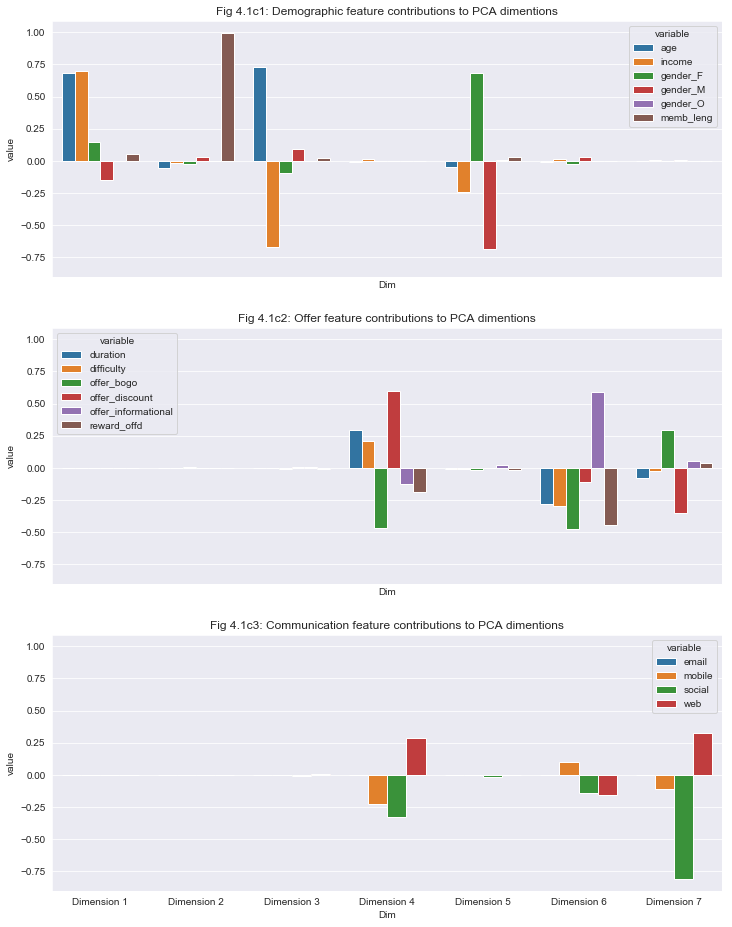

In [134]:
fig_4_1c, ax_4_1c = plt.subplots(nrows = 3, ncols=1, sharex=True,sharey=True ,figsize=(12, 16));
sns.barplot(data=res_melt[res_melt['variable'].isin(demo_feat)],x='Dim',y='value',hue='variable',ax=ax_4_1c[0]);
sns.barplot(data=res_melt[res_melt['variable'].isin(offer_feat)],x='Dim',y='value',hue='variable',ax=ax_4_1c[1]);
sns.barplot(data=res_melt[res_melt['variable'].isin(communication_feat)],x='Dim',y='value',hue='variable',ax=ax_4_1c[2]);
fig_4_1c.subplots_adjust(hspace = .2)

ax_4_1c[0].set_title('Fig 4.1c1: Demographic feature contributions to PCA dimentions');
ax_4_1c[1].set_title('Fig 4.1c2: Offer feature contributions to PCA dimentions');
ax_4_1c[2].set_title('Fig 4.1c3: Communication feature contributions to PCA dimentions');


Observations:
pca dimentions 1,2,3,5 seems to represent the demographic dimentions
               4,6,7 seems to represent study features and communication methods
               

In [ ]:
sns.barplot(data=res_melt[res_melt['variable'].isin(['offer_bogo','offer_discount','offer_informational'])],x='Dim',y='value',hue='variable');

In [ ]:
sns.barplot(data=res_melt[res_melt['variable'].isin(['offer_bogo','offer_discount','offer_informational'])],x='Dim',y='value',hue='variable');

In [ ]:
dim1_feat = res.loc['Dimension 1',:].sort_values(ascending=False)[:4].append(res.loc['Dimension 1',:].sort_values(ascending=False)[-4:])

#### 4.2 Model K-Means
<a id='sec_4_2'></a>
<a href='#TOC'>Jump to top</a>

In [ ]:
df_Xpca7 = pd.DataFrame(X_pca7)
toy_dataset = df_Xpca7.sample(n=int(df_Xpca7.shape[0]*0.3))

In [ ]:
centers_t = []
scores_t = []

for ii in range(1,31):
    
    if ii>1:
        k_pick_t = open('kdict_t.pickle',"rb")
        k_dict_t = pickle.load(k_pick_t)
        scores_t = k_dict_t['scores']
        centers_t = k_dict_t['centers']
    
    #if ii>=centers_t[len(centers_t)-1]:
    time1 = time.time()
    print('Fitting ',ii,' kmean centers ')
    kmeans_t = KMeans(ii)
    model_t = kmeans_t.fit(toy_dataset.values)
    labels_t = model_t.predict(toy_dataset.values)
    centers_t.append(ii)
    scores_t.append(abs(model_t.score(toy_dataset)))
    time2 = (time.time() - time1)/60
    print('Loop ',ii,' took ', time2, ' minutes to complete')

    k_dict_t = {'scores': scores_t,
             'centers': centers_t}

    k_pick_t = open('kdict_t.pickle',"wb")
    pickle.dump(k_dict_t,k_pick_t)

In [ ]:


kmeans_scores = pd.DataFrame({'centers': k_dict_t['centers'],'scores': k_dict_t['scores']})
kmeans_scores = kmeans_scores.drop_duplicates('centers')

In [ ]:
#5% sample
plt.plot(kmeans_scores['centers'],kmeans_scores['scores'].diff(), linestyle='--', marker='o', color='b');
plt.xlabel('K-(K_-1)');
plt.ylabel('Delta_SSE');
plt.xticks(np.arange(1,30,step=2));
plt.grid()
plt.title('Fig 4.2b: Delta_SSE vs. K-(K_-1)');

In [ ]:
K5 = KMeans(5)

In [ ]:
K5.fit(X_pca7)

In [ ]:
dump(K5,'K5.model')

In [ ]:
K5_model = load('K5.model')

### 4.3 - Segment and Apply Models to Population Segments

In [ ]:
pca_model = load('pca7.model')
kmeans_model = load('K5.model')

In [ ]:
ems_viewed_false = events_merged_std[events_merged_std['event_offer_viewed']==0]
ems_viewed_true = events_merged_std[events_merged_std['event_offer_viewed']==1]
ems_purch_false = ems_viewed_true[ems_viewed_true['event_offer_completed']==0]
ems_purch_true = ems_viewed_true[ems_viewed_true['event_offer_completed']==1]

In [ ]:
Xpca_ems_all = pca_model.transform(events_merged_std[X_col])
Xpca_emsv_false = pca_model.transform(ems_viewed_false[X_col])
Xpca_emsv_true = pca_model.transform(ems_viewed_true[X_col])
Xpca_emsp_false = pca_model.transform(ems_purch_false[X_col])
Xpca_emsp_true = pca_model.transform(ems_purch_true[X_col])

In [ ]:
k_ems_all = kmeans_model.predict(Xpca_ems_all)
k_emsv_false = kmeans_model.predict(Xpca_emsv_false)
k_emsv_true = kmeans_model.predict(Xpca_emsv_true)
k_emsp_false = kmeans_model.predict(Xpca_emsp_false)
k_emsp_true = kmeans_model.predict(Xpca_emsp_true)

In [ ]:
label_all= np.unique(k_ems_all,return_counts=True)
label_v_false = np.unique(k_emsv_false,return_counts=True)
label_v_true = np.unique(k_emsv_true,return_counts=True)
label_p_false = np.unique(k_emsp_false,return_counts=True)
label_p_true = np.unique(k_emsp_true,return_counts=True)

In [ ]:
df_Xpca_ems_all = pd.DataFrame(Xpca_ems_all)
df_Xpca_emsv_true = pd.DataFrame(Xpca_emsv_true)
df_Xpca_emsv_false = pd.DataFrame(Xpca_emsv_false)
df_Xpca_emsp_true = pd.DataFrame(Xpca_emsp_true)
df_Xpca_emsp_false = pd.DataFrame(Xpca_emsp_false)
df_Xpca_ems_all['cluster'] = k_ems_all
df_Xpca_emsv_true['cluster'] = k_emsv_true
df_Xpca_emsv_false['cluster'] = k_emsv_false
df_Xpca_emsp_true['cluster'] = k_emsp_true
df_Xpca_emsp_false['cluster'] = k_emsp_false



df_Xpca_emsv_true['purchase'] = True
df_Xpca_emsv_false['purchase'] = False
df_Xpca_emsp_true['purchase'] = True
df_Xpca_emsp_false['purchase'] = False


df_Xpca_emsv = df_Xpca_emsv_true.append(df_Xpca_emsv_false)
df_Xpca_emsp = df_Xpca_emsp_true.append(df_Xpca_emsp_false)



df_Xpca_ems_all_melt = df_Xpca_ems_all.melt(id_vars=['cluster'],value_vars=[0, 1, 2, 3, 4, 5, 6],var_name='pca_dim')
df_Xpca_emsv_melt = df_Xpca_emsv.melt(id_vars=['cluster','purchase'],value_vars=[0, 1, 2, 3, 4, 5, 6],var_name='pca_dim')
df_Xpca_emsp_melt = df_Xpca_emsp.melt(id_vars=['cluster','purchase'],value_vars=[0, 1, 2, 3, 4, 5, 6],var_name='pca_dim')

In [ ]:
def props(label): return label[1]/label[1].sum()

In [ ]:
lprops_all = props(label_all)
lprops_v_false = props(label_v_false)
lprops_v_true = props(label_v_true)
lprops_p_false = props(label_p_false)
lprops_p_true = props(label_p_true)

In [ ]:
props = pd.DataFrame(lprops_all,columns=['all'])
props['uviewed'] = lprops_v_false
props['viewed'] = lprops_v_true
props['viewed_and_nopurch'] = lprops_p_false
props['viewed_and_purch'] = lprops_p_true

In [ ]:
props['id'] = props.index

In [ ]:
props

In [ ]:
props_view = props[['uviewed','viewed','id']].melt(id_vars=['id'],value_vars=['uviewed','viewed'])
props_purch = props[['viewed_and_nopurch','viewed_and_purch','id']].melt(id_vars=['id'],value_vars=['viewed_and_nopurch','viewed_and_purch'])

#### 4.4 Compare Proportion of populations in K-mean clusters

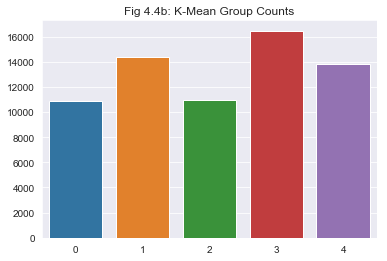

In [129]:
fig4_4b = sns.barplot(x=label_all[0],y=label_all[1]);
fig4_4b.set_title('Fig 4.4b: K-Mean Group Counts');

In [ ]:
###  Proportion Z-Test 

#H_0: p_0 = p_1
#H_1: p_0 < or > p_1


n_obs_view = np.array([k_emsv_true.shape[0],k_emsv_false.shape[0]])

stat_v = []
p_val_v = []

for obs in zip(label_v_true[1],label_v_false[1]):
    stat,pval = proportions_ztest(np.array([obs[0],obs[1]]),n_obs_view,alternative='two-sided')
    stat_v.append(stat)
    p_val_v.append(pval)

n_obs_purch = np.array([k_emsp_true.shape[0],k_emsp_false.shape[0]])

stat_p = []
p_val_p = []

for obs in zip(label_p_true[1],label_p_false[1]):
    stat,pval = proportions_ztest(np.array([obs[0],obs[1]]),n_obs_purch,alternative='two-sided')
    stat_p.append(stat)
    p_val_p.append(pval)
    

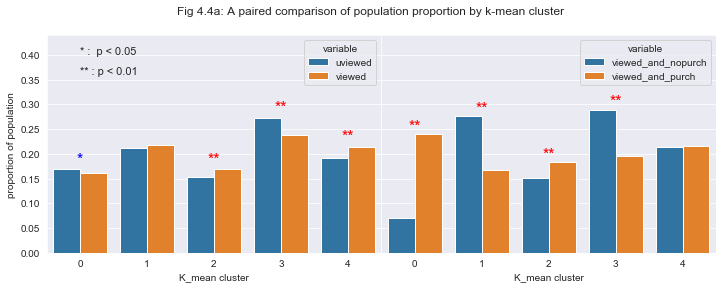

In [127]:
fig_4_4a, ax_4_4a = plt.subplots(nrows=1, ncols=2,sharey=True,figsize=(12,4))
fig_4_4a.suptitle('Fig 4.4a: A paired comparison of population proportion by k-mean cluster')
fig_4_4a.subplots_adjust(wspace = 0)
sns.barplot(data=props_view,x='id',y='value',hue='variable',ax=ax_4_4a[0])

col1 = 'red'
col2 = 'blue'

t1_yoffsets = []
for x in ax_4_4a[0].get_xticks():
    t1_yoffsets.append(props_view[props_view['id']==x]['value'].max())
    if p_val_v[x] < 0.01:
        ax_4_4a[0].text(x, t1_yoffsets[x]+0.005 , "**", fontsize=16,ha='center', va='bottom', color=col1)
        continue
    elif p_val_v[x] < 0.05:
        ax_4_4a[0].text(x, t1_yoffsets[x]+0.005 , "*", fontsize=16,ha='center', va='bottom', color=col2)
        continue

ax_4_4a[0].set_ybound(0,props_view['value'].max()+0.1)


sns.barplot(data=props_purch,x='id',y='value',hue='variable',ax=ax_4_4a[1])

t2_yoffsets = []
for x in ax_4_4a[1].get_xticks():
    t2_yoffsets.append(props_purch[props_purch['id']==x]['value'].max())
    if p_val_p[x] < 0.01:
        ax_4_4a[1].text(x, t2_yoffsets[x] , "**", fontsize=16,ha='center', va='bottom', color=col1)
        continue
    elif p_val_p[x] < 0.05:
        ax_4_4a[1].text(x, t2_yoffsets[x] , "*", fontsize=16,ha='center', va='bottom', color=col2)
        continue

ax_4_4a[1].set_xlabel('K_mean cluster')
ax_4_4a[0].set_xlabel('K_mean cluster')
ax_4_4a[0].set_ylabel('proportion of population')
ax_4_4a[1].set_ylabel('')
ax_4_4a[1].set_ybound(0,props_purch['value'].max()+0.15)
ax_4_4a[0].annotate(s='* :  p < 0.05',xy=(0,0.4), fontsize=11)
ax_4_4a[0].annotate(s='** : p < 0.01',xy=(0,0.36), fontsize=11)
fig_4_4a.show()

What is interesting here is that there is two k-mean clusters in each the viewing and purchase slices that show significant preference to view or purchase.   The only overlapping group is k-mean 2.  The other k-mean group that shows a significant difference as well a impactcful magnitude difference is k-mean 0.

Groups 1 and 3 and more adverse to purchasing, as ewell as group 3 is adverse to even view o

In [122]:
p_val_p

[0.0,
 2.4997911824878614e-187,
 1.0997839485858592e-19,
 2.683415562050894e-128,
 0.5794909109924893]

In [109]:
(props['viewed']-props['uviewed'])*100

0   -0.682821
1    0.432004
2    1.461125
3   -3.400123
4    2.189815
dtype: float64

In [110]:
(props['viewed_and_purch']-props['viewed_and_nopurch'])*100

0    16.955038
1   -10.922178
2     3.083799
3    -9.322946
4     0.206286
dtype: float64

Although there were some significant difference between groups that viewed the offers the effect size is not practially differet.

In regards to the differences purchases in those who viewed the offers, the effects sizes are practically different.
In K-mean cluster 0, there is a 17percentage point difference 
In Kmean 1 and 3, there is about a 10% point difference



#### 4.5 Analysis of differences 

In [111]:
v_clust_sig = [0,2,3,4]
p_clust_sig = [0,1,2,3]
all_clust_sig = [0,1,2,3,4]

#### Viewed v Unviewed
High Significant difference (p < 0.01) in clusters 1,2 </br>
Significant difference (P < 0.05) in cluster 3,4


In [156]:
Xpca_mean_by_kcluster = df_Xpca_ems_all[[0,1,2,3,4,5,6,'cluster']].groupby(by='cluster').mean().round(2).rename(columns={0:1,1:2,2:3,3:4,4:5,5:6,6:7})
Xpca_mean_by_kcluster

,1,2,3,4,5,6,7
cluster,,,,,,,
0,1.01,-0.14,-0.29,0.87,0.01,-0.13,-0.18
1,-0.09,-0.56,0.96,-0.09,-0.04,0.03,0.01
2,-0.38,1.70,0.17,-0.03,-0.03,0.01,0.01
3,-1.30,-0.43,-0.41,-0.00,0.04,0.01,-0.00
4,1.14,-0.14,-0.41,-0.57,0.02,0.06,0.12


**Purchasing Clusters - Cluster 2 and Cluster 0** </br>
Viewing Dimentions (>0.10)

K-Mean Cluster 0: </br>
    Significantly less viewers (magnitude:  0.6%)
    Of those that viewed signficantly more purchasers (magnitude: 17%)</br>
- Dim1:  1.01 
    - demographics: age(+++), income(+++),gender_M(+),gender_F(-)
- Dim2: -0.14
    - demographics: member length (+++)
- Dim3: -0.29 
    - Demographics: age(+++),income(---),fem(-),male(+)
- Dim4:  0.87 
    - Study Feat: discount(++), duration(+), difficulty(+), BOGO(--), infor.(-), reward(-)
    - Comm. Feat: web(+), social(-), mobile(-)
-Dim6: -0.13
    - Study Feat: informational(++),duration(-),difficulty(-), bogo(--), reward offered(++), discount(+)
    - Comm. Feat: mobile(+), social(-),web(-)
-Dim7: -0.18 
    - Study Feat.: BOGO(+), Discount(-)
    - Comm Feat: Mobile(-), Socal(---), Web(++)
    
K-Mean Cluster 2: 
    Significantly more Viewers(magnitude: 1.46%)
    Of those that viewed significantly more Purchasers(magnitude: 3.08%) 
- Dim1: -0.28 
    - demographics: age(+++), income(+++),gender_M(+),gender_F(-)
- Dim2:  1.70 
    - demographics: member length (+++)
- Dim3: 0.17
    - Demographics: age(+++),income(---),fem(-),male(+)

    


**Non-Purchasing Clusters - Cluster 1 and Cluster 3**

K-Mean Cluster 1:</br>
    NS in viewers </br>
    Of those that viewed, Significantly less purchasers(-10.9%)
- Dim 1: (-0.09)
    - demographics: age(+++), income(+++),gender_M(+),gender_F(-)
- Dim 2: (-0.56)
    - demographics: member length (+++)
- Dim 3: ( 0.09)
    - Demographics: age(+++),income(---),fem(-),male(+)
    
K-Mean Cluster 3:</br>
   Signifcantly less viewers (magnitude: -3.4%)
   of those that viewed, Significantly less purchasers (magnitude (-9.3%))
- Dim 1: (1.30)
    - demographics: age(+++), income(+++),gender_M(+),gender_F(-)
- Dim 2: (-0.43)
    - demographics: member length (+++)
- Dim 3: (-0.41)
    - Demographics: age(+++),income(---),fem(-),male(+)

K-Mean Cluster 4:</br>
    Sig more viewers (2.2%) </br>
    NS in purchasers
- Dim 1: (1.14)
    - demographics: age(+++), income(+++),gender_M(+),gender_F(-)
- Dim 2: (-0.14)
    - demographics: member length (+++)
- Dim 3: ( 0.41)
    - Demographics: age(+++),income(---),fem(-),male(+)
- Dim 4: (-0.57)
    - Study Feat: discount(++), duration(+), difficulty(+), BOGO(--), infor.(-), reward(-)
    - Comm. Feat: web(+), social(-), mobile(-)
- Dim 7: ( 0.12)
    - Study Feat.: BOGO(+), Discount(-)
    - Comm Feat: Mobile(-), Socal(---), Web(++)

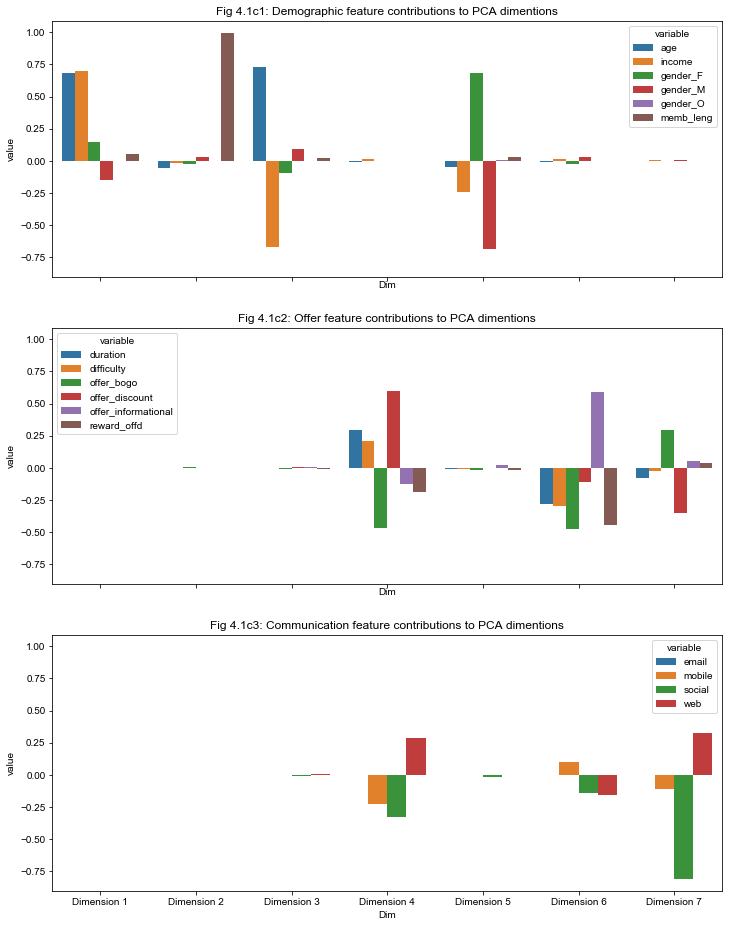

In [131]:
fig_4_1c

In [151]:
Xpca_means_by_cluster = df_Xpca_ems_all[[0,1,2,3,4,5,6,'cluster']].groupby(by='cluster').mean().round(2).rename(columns={0:1,1:2,2:3,3:4,4:5,5:6,6:7})
Xpca_means_by_cluster.to_csv('xpca_by_cluster.csv')

In [148]:
res

,duration,time,age,income,gender_F,gender_M,gender_O,memb_leng,difficulty,email,mobile,social,web,offer_bogo,offer_discount,offer_informational,reward_offd
Dimension 1,-0.0017,0.0001,0.6813,0.6995,0.1476,-0.1472,-0.0004,0.0558,-0.0012,0.0,0.0007,0.0015,-0.0018,0.0006,-0.0025,0.0019,-0.0003
Dimension 2,0.0005,-0.0001,-0.0537,-0.0150,-0.0283,0.0299,-0.0017,0.9976,0.0006,-0.0,-0.0004,-0.0019,-0.0009,0.0031,-0.0026,-0.0004,0.0020
Dimension 3,0.0011,0.0008,0.7285,-0.6708,-0.0971,0.0958,0.0013,0.0235,-0.0005,-0.0,-0.0026,-0.0068,0.0041,-0.0079,0.0042,0.0037,-0.0058
Dimension 4,0.2930,-0.0008,-0.0053,0.0111,-0.0015,0.0012,0.0002,0.0024,0.2075,0.0,-0.2299,-0.3305,0.2884,-0.4698,0.5953,-0.1255,-0.1865
Dimension 5,-0.0104,-0.0000,-0.0466,-0.2454,0.6815,-0.6858,0.0044,0.0338,-0.0100,-0.0,-0.0006,-0.0135,-0.0044,-0.0186,-0.0050,0.0237,-0.0172
Dimension 6,-0.2798,0.0009,-0.0056,0.0134,-0.0269,0.0263,0.0007,0.0006,-0.2993,0.0,0.0965,-0.1427,-0.1535,-0.4728,-0.1142,0.5870,-0.4428
Dimension 7,-0.0798,0.0015,-0.0015,0.0045,-0.0049,0.0044,0.0005,-0.0034,-0.0280,-0.0,-0.1112,-0.8123,0.3290,0.2942,-0.3481,0.0539,0.0406


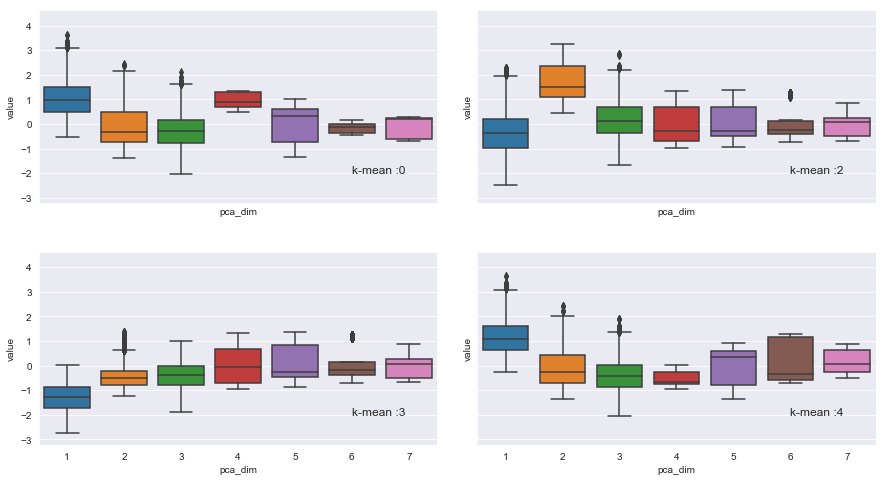

In [115]:
## Graph pca dimentions to K-Mean
sns.set_style("darkgrid")
fig_4_3a, ax_4_3a = plt.subplots(nrows = 2, ncols= 2, sharex= True,sharey=True, figsize=(15,8))
sns.boxplot(data=df_Xpca_emsv_melt[df_Xpca_emsv_melt.cluster==v_clust_sig[0]],x='pca_dim',y='value',ax=ax_4_3a[0,0]).annotate(s='k-mean :'+ str(v_clust_sig[0]),xy=(5,-2),fontsize=12)
sns.boxplot(data=df_Xpca_emsv_melt[df_Xpca_emsv_melt.cluster==v_clust_sig[1]],x='pca_dim',y='value',ax=ax_4_3a[0,1]).annotate(s='k-mean :'+ str(v_clust_sig[1]),xy=(5,-2),fontsize=12)
sns.boxplot(data=df_Xpca_emsv_melt[df_Xpca_emsv_melt.cluster==v_clust_sig[2]],x='pca_dim',y='value',ax=ax_4_3a[1,0]).annotate(s='k-mean :'+ str(v_clust_sig[2]),xy=(5,-2),fontsize=12)
sns.boxplot(data=df_Xpca_emsv_melt[df_Xpca_emsv_melt.cluster==v_clust_sig[3]],x='pca_dim',y='value',ax=ax_4_3a[1,1]).annotate(s='k-mean :'+ str(v_clust_sig[3]),xy=(5,-2),fontsize=12)

fig_4_3a.subplots_adjust(hspace = 0.25)
fig_4_3a.subplots_adjust(wspace = 0.1)

ax_4_3a[0,0].set_ybound(df_Xpca_emsv_melt.value.min()-0.5,df_Xpca_emsv_melt.value.max()+1)

ax_4_3a[1,0].set(xticklabels=(df_Xpca_emsv_melt.pca_dim.unique()+1));
ax_4_3a[1,1].set(xticklabels=(df_Xpca_emsv_melt.pca_dim.unique()+1));



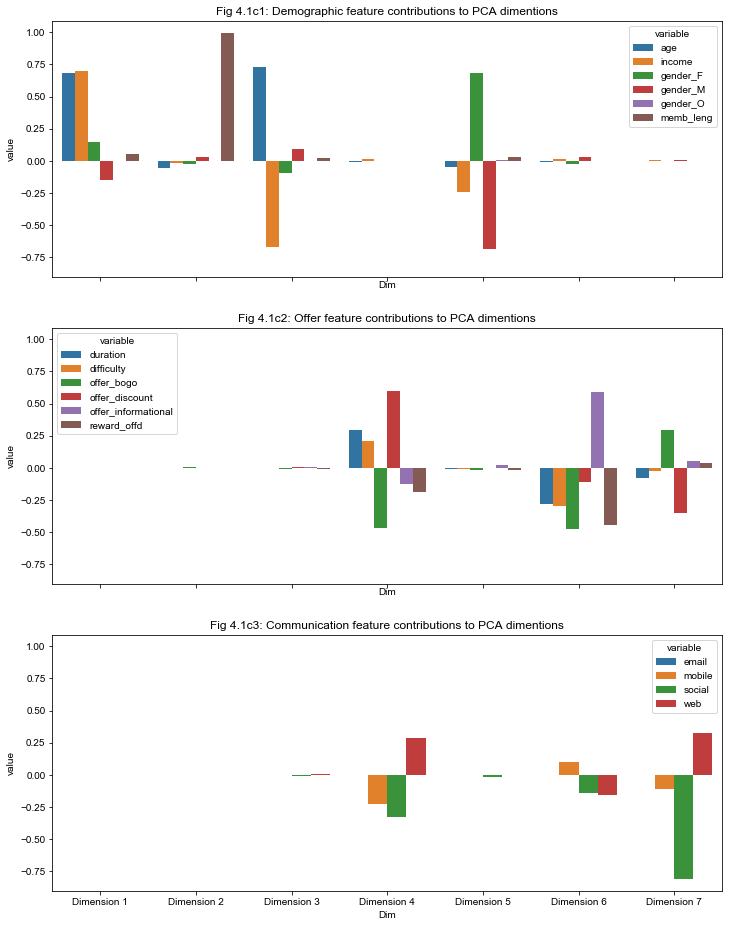

In [130]:
fig_4_1c

#### Viewed and Purchased v Not-Purchased
High Significant difference (p < 0.01) in clusters 0,1,2,3

In [ ]:
Xpca_view_mean = df_Xpca_emsv.drop(columns=['purchase']).groupby(by='cluster').mean()
K_mean_feat_v = pd.DataFrame(np.dot(Xpca_view_mean,res).T,index=res.columns)
K_mean_feat_v.drop(columns=1,inplace=True)
K_mean_feat_v_melt = K_mean_feat_v.reset_index().rename(columns={'index':'features'}).melt(id_vars='features')
K_mean_feat_v_melt = K_mean_feat_v_melt[abs(K_mean_feat_v_melt.value)>0.1]

blahv,blahaxv = plt.subplots(figsize=(12,8))
sns.barplot(data=K_mean_feat_v_melt,x='variable',y='value',hue='features',ax=blahaxv)
blahaxv.legend(loc=1)

In [ ]:
Xpca_purch_mean = df_Xpca_emsp.drop(columns=['purchase']).groupby(by='cluster').mean()
K_mean_feat_p = pd.DataFrame(np.dot(Xpca_purch_mean,res).T,index=res.columns)
K_mean_feat_p.drop(columns=4,inplace=True)
K_mean_feat_p_melt = K_mean_feat_p.reset_index().rename(columns={'index':'features'}).melt(id_vars='features')
K_mean_feat_p_melt = K_mean_feat_p_melt[abs(K_mean_feat_p_melt.value)>0.1]

blah,blahax = plt.subplots(figsize=(12,8))
sns.barplot(data=K_mean_feat_p_melt,x='variable',y='value',hue='features',ax=blahax)
blahax.legend(loc=1)

Viewed



### 4.3 - Analyze clusters for comprehension of differences
<a id='sec_4_3'></a>
<a href='#TOC'>Jump to Top</a>

In [ ]:
df_Xpca_ems_all.head()

In [ ]:
p_table_view = pd.DataFrame(columns=['k_mean','pca_dim','p_value'])
p_table_purch = pd.DataFrame(columns=['k_mean','pca_dim','p_value'])

for k_m in df_Xpca_emsv_melt.cluster.unique():
    for p_d in df_Xpca_emsv_melt.pca_dim.unique():
        stat,p_val = stats.ttest_ind(df_Xpca_emsv_melt[(df_Xpca_emsv_melt.cluster == k_m) & (df_Xpca_emsv_melt.purchase == False) & (df_Xpca_emsv_melt.pca_dim == p_d)].value,
                    df_Xpca_emsv_melt[(df_Xpca_emsv_melt.cluster == k_m) & (df_Xpca_emsv_melt.purchase == True) &  (df_Xpca_emsv_melt.pca_dim == p_d)].value,
                    equal_var=False)
        p_table_view = p_table_view.append({'k_mean': k_m, 'pca_dim': p_d, 'p_value': p_val},ignore_index=True)
            
for k_m in df_Xpca_emsp_melt.cluster.unique():
    for p_d in df_Xpca_emsp_melt.pca_dim.unique():
        stat,p_val = stats.ttest_ind(df_Xpca_emsp_melt[(df_Xpca_emsp_melt.cluster == k_m) & (df_Xpca_emsp_melt.purchase == False) & (df_Xpca_emsp_melt.pca_dim == p_d)].value,
                    df_Xpca_emsp_melt[(df_Xpca_emsp_melt.cluster == k_m) & (df_Xpca_emsp_melt.purchase == True) &  (df_Xpca_emsp_melt.pca_dim == p_d)].value,
                    equal_var=False)
        p_table_purch = p_table_purch.append({'k_mean': k_m, 'pca_dim': p_d, 'p_value': p_val},ignore_index=True)

In [ ]:
##TODO: Just plot the PCA boxplots for the dimentions that are helpful, using the 'all' data

In [ ]:
df_Xpca_emsv_melt.pca_dim.unique()+1

In [ ]:
df_Xpca_emsv.boxplot(by='cluster',column=[0,1,2,3,4,5],figsize=(9,9))

In [ ]:
##
sns.set_style("darkgrid")
fig_4_3a, ax_4_3a = plt.subplots(nrows = 4, ncols= 1, sharey=True, figsize=(9,15))
for cl in range(len(v_clust_sig)):
    sns.boxplot(data=df_Xpca_emsv_melt[df_Xpca_emsv_melt.cluster==v_clust_sig[cl]],x='pca_dim',y='value',ax=ax_4_3a[cl])
    ax_4_3a[cl].annotate(s='k-mean :'+ str(v_clust_sig[cl]),xy=(5,-2),fontsize=12)
fig_4_3a.subplots_adjust(hspace = 0)

ax_4_3a[0].set_ybound(df_Xpca_emsv_melt.value.min()-0.5,df_Xpca_emsv_melt.value.max()+1)

ax_4_3a[3].set(xticklabels=df_Xpca_emsv_melt.pca_dim.unique()+1);



In [ ]:
sns.set_style("darkgrid")
fig_4_3b, ax_4_3b = plt.subplots(nrows = 4, ncols= 1, sharey=True, figsize=(9,15))
for cl in range(len(p_clust_sig)):
    sns.boxplot(data=df_Xpca_emsp_melt[df_Xpca_emsp_melt.cluster==p_clust_sig[cl]],x='pca_dim',y='value',ax=ax_4_3b[cl])
    ax_4_3b[cl].annotate(s='k-mean :'+ str(p_clust_sig[cl]),xy=(5,-2),fontsize=12)
fig_4_3b.subplots_adjust(hspace = 0)

ax_4_3b[0].set_ybound(df_Xpca_emsp_melt.value.min()-0.5,df_Xpca_emsp_melt.value.max()+1)

ax_4_3b[3].set(xticklabels=df_Xpca_emsp_melt.pca_dim.unique()+1);

## Purch Graph

fig_4_3c, ax_4_3c = plt.subplots(nrows = 4, ncols= 1,sharey=True, figsize=(9,15))
for cl in range(len(p_clust_sig)):
    sns.boxplot(data=df_Xpca_emsp_melt[df_Xpca_emsp_melt['cluster']==cl],x='pca_dim',y='value',hue='purchase',ax=ax_4_3c[cl])
fig_4_3c.subplots_adjust(hspace = 0)

col1 = 'red'
col2 = 'blue'

for ax in range(len(ax_4_3c)): # loop for every subplot
    yoffsets = []  # list to store yoffsets for annotations
    for x in ax_4_3c[ax].get_xticks(): # loop through every boxplot in subplot
        yoffsets.append(df_Xpca_emsp_melt[(df_Xpca_emsp_melt.cluster==p_clust_sig[ax]) &
                                         (df_Xpca_emsp_melt.pca_dim==x)].value.max()) # position above max value
        if float(p_table_purch[(p_table_purch.k_mean == p_clust_sig[ax]) & (p_table_view.pca_dim == x)].p_value) < 0.01:
            ax_4_3c[ax].text(x, yoffsets[x] , "**", fontsize=16,ha='center', va='bottom', color=col1)
            continue
        elif float(p_table_purch[(p_table_purch.k_mean == p_clust_sig[ax]) & (p_table_purch.pca_dim == x)].p_value) < 0.05:
            ax_4_3c[ax].text(x, yoffsets[x] , "*", fontsize=16,ha='center', va='bottom', color=col2)
            continue

ax_4_3c[0].set_ybound(df_Xpca_emsp_melt.value.min()-0.5,df_Xpca_emsp_melt.value.max()+1)
for blah in range(len(ax_4_3c)):
    ax_4_3c[blah].annotate(s='k-mean :'+ str(p_clust_sig[blah]),xy=(5,-2),fontsize=12)
ax_4_3c[3].set(xticklabels=df_Xpca_emsp_melt.pca_dim.unique()+1);

In [ ]:
results_4_3_c = df_Xpca_emsp.groupby(by=['cluster','purchase']).mean()
results_4_3_c.to_csv('results_4_3_c.csv')

## View Graph
fig_4_3c, ax_4_3c = plt.subplots(nrows = 4, ncols= 1,sharey=True, figsize=(9,15))
for cl in range(len(v_clust_sig)):
    sns.boxplot(data=df_Xpca_emsv_melt[df_Xpca_emsv_melt['cluster']==cl],x='pca_dim',y='value',hue='purchase',ax=ax_4_3c[cl])
fig_4_3c.subplots_adjust(hspace = 0)

col1 = 'red'
col2 = 'blue'

for ax in range(len(ax_4_3c)): # loop for every subplot
    yoffsets = []  # list to store yoffsets for annotations
    for x in ax_4_3c[ax].get_xticks(): # loop through every boxplot in subplot
        yoffsets.append(df_Xpca_emsv_melt[(df_Xpca_emsv_melt.cluster==v_clust_sig[ax]) &
                                         (df_Xpca_emsv_melt.pca_dim==x)].value.max()) # position above max value
        if float(p_table_view[(p_table_view.k_mean == v_clust_sig[ax]) & (p_table_view.pca_dim == x)].p_value) < 0.01:
            ax_4_3c[ax].text(x, yoffsets[x] , "**", fontsize=16,ha='center', va='bottom', color=col1)
            continue
        elif float(p_table_view[(p_table_view.k_mean == p_clust_sig[ax]) & (p_table_view.pca_dim == x)].p_value) < 0.05:
            ax_4_3b[ax].text(x, yoffsets[x] , "*", fontsize=16,ha='center', va='bottom', color=col2)
            continue

ax_4_3b[0].set_ybound(df_Xpca_emsp_melt.value.min()-0.5,df_Xpca_emsp_melt.value.max()+1)
for blah in range(len(ax_4_3b)):
    ax_4_3b[blah].annotate(s='k-mean :'+ str(p_clust_sig[blah]),xy=(5,-2),fontsize=12)

#### 4.3.1: Purchase Cluster Analysis

Below I am going to multiply the average Xpca value of the cluster and multiply it against the eigenvector

In [ ]:
cl_1_p= df_Xpca_emsp[df_Xpca_emsp.cluster==1].drop(columns=['cluster','purchase']).mean().values.reshape((7,1))
cl_2_p= df_Xpca_emsp[df_Xpca_emsp.cluster==2].drop(columns=['cluster','purchase']).mean().values.reshape((7,1))
cl_3_p= df_Xpca_emsp[df_Xpca_emsp.cluster==3].drop(columns=['cluster','purchase']).mean().values.reshape((7,1))
cl_4_p= df_Xpca_emsp[df_Xpca_emsp.cluster==4].drop(columns=['cluster','purchase']).mean().values.reshape((7,1))
df_pca_cl_p = pd.DataFrame(np.dot(res.transpose().values,cl_2_p),index=res.columns).sort_values(by=0, ascending=False)

df_pca_cl_2_p = pd.DataFrame(np.dot(res.transpose().values,cl_2_p),index=res.columns).sort_values(by=0, ascending=False)

In [ ]:
df_pca_cl_2_p.iloc[:4,:],df_pca_cl_2_p.iloc[-4:,:]

In [ ]:
def mean_xpca_per_cluster(xpca,cluster=0):
    return xpca[xpca.cluster==cluster].drop(columns=['cluster','purchase']).mean().values.reshape((7,1))

In [ ]:
pca_mag_p1 = np.dot(res.transpose().values,mean_xpca_per_cluster(df_Xpca_emsp,cluster=1))
pca_mag_p2 = np.dot(res.transpose().values,mean_xpca_per_cluster(df_Xpca_emsp,cluster=2))
pca_mag_p3 = np.dot(res.transpose().values,mean_xpca_per_cluster(df_Xpca_emsp,cluster=3))
pca_mag_p4 = np.dot(res.transpose().values,mean_xpca_per_cluster(df_Xpca_emsp,cluster=4))
pca_mag_p0 = np.dot(res.transpose().values,mean_xpca_per_cluster(df_Xpca_emsv,cluster=0))
pca_mag_p1 = np.dot(res.transpose().values,mean_xpca_per_cluster(df_Xpca_emsv,cluster=1))
pca_mag_p2 = np.dot(res.transpose().values,mean_xpca_per_cluster(df_Xpca_emsv,cluster=2))
pca_mag_p3 = np.dot(res.transpose().values,mean_xpca_per_cluster(df_Xpca_emsv,cluster=3))

In [ ]:
pd.DataFrame(pca_mag_p1).head()

In [ ]:
cl_2_all= df_Xpca_ems_all[df_Xpca_ems_all.cluster==2].drop(columns=['cluster']).mean().values.reshape((7,1))
cl_2_v= df_Xpca_emsv[df_Xpca_emsv.cluster==2].drop(columns=['cluster','purchase']).mean().values.reshape((7,1))
cl_2_p= df_Xpca_emsp[df_Xpca_emsp.cluster==2].drop(columns=['cluster','purchase']).mean().values.reshape((7,1))


In [ ]:
cl_2_all= df_Xpca_ems_all[df_Xpca_ems_all.cluster==2].drop(columns=['cluster']).mean().values.reshape((7,1))
cl_2_v= df_Xpca_emsv[df_Xpca_emsv.cluster==2].drop(columns=['cluster','purchase']).mean().values.reshape((7,1))
cl_2_p= df_Xpca_emsp[df_Xpca_emsp.cluster==2].drop(columns=['cluster','purchase']).mean().values.reshape((7,1))


In [ ]:
cl_2_all= df_Xpca_ems_all[df_Xpca_ems_all.cluster==2].drop(columns=['cluster']).mean().values.reshape((7,1))
cl_2_v= df_Xpca_emsv[df_Xpca_emsv.cluster==2].drop(columns=['cluster','purchase']).mean().values.reshape((7,1))
cl_2_p= df_Xpca_emsp[df_Xpca_emsp.cluster==2].drop(columns=['cluster','purchase']).mean().values.reshape((7,1))


In [ ]:
cl_2_all= df_Xpca_ems_all[df_Xpca_ems_all.cluster==2].drop(columns=['cluster']).mean().values.reshape((7,1))
cl_2_v= df_Xpca_emsv[df_Xpca_emsv.cluster==2].drop(columns=['cluster','purchase']).mean().values.reshape((7,1))
cl_2_p= df_Xpca_emsp[df_Xpca_emsp.cluster==2].drop(columns=['cluster','purchase']).mean().values.reshape((7,1))


#### **Viewed**</br>
**Cluster 2 has the highest magnitude of differences, followed by 0 and 3.** </br>
unviewed is represented more by cluster 2</br>
viewed is represented more by cluster 0 and 3</br>

#### **Purch** </br>
**Cluster 1 has the highest magnitude of differences, followed by 4,2,then 3**</br>
purchase is more represented in cluster 1 and 3
no_purchase is more represented in 4 and 2





In [ ]:
Viewed
* 